In [320]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import random
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from numpy.ma.core import resize
import seaborn as sns
from PIL import Image
plt.style.use('seaborn')
!pip install Pillow

<ipython-input-320-aad766887b2c>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [321]:
from numpy.core.fromnumeric import var

### **1. Implement a contrast stretching algorithm**

This is image1


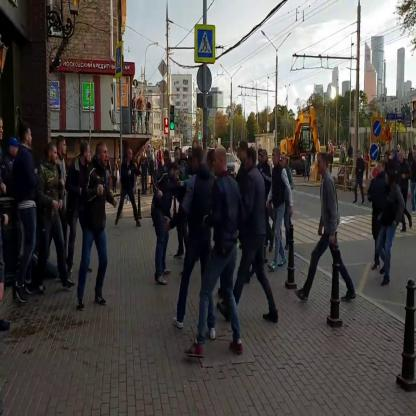

In [322]:
image1=cv2.imread("V3.jpg")
print("This is image1")
cv2_imshow(image1)

In [323]:
mean_color_image1=np.mean(image1, axis=(0,1))
print("Mean RGB values for image1\n",mean_color_image1)

Mean RGB values for image1
 [73.20363351 75.94248683 79.59780071]


In [324]:
var_image1= np.var(image1)
var_image1

4265.468745894028

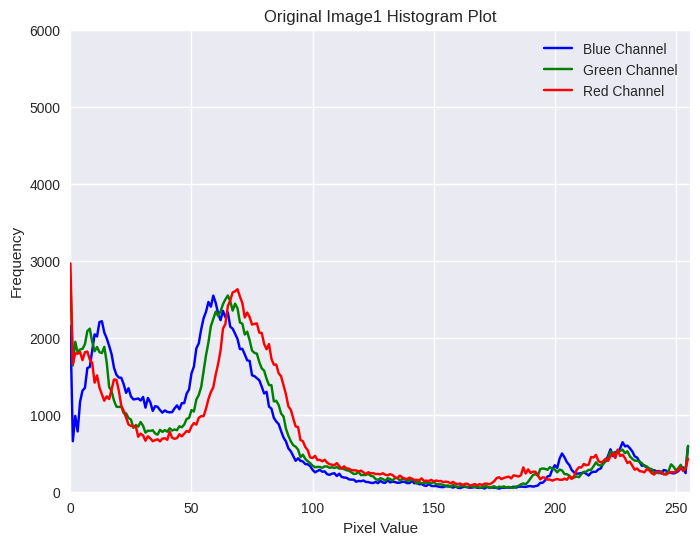

In [325]:
# Split the image into color channels
b, g, r = cv2.split(image1)

# Create a histogram for each color channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Plot the histograms on a single figure
plt.figure(figsize=(8, 6))
plt.title("Original Image1 Histogram Plot")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.ylim(0,6000)

plt.plot(hist_b, color="blue", label="Blue Channel", alpha=1)
plt.plot(hist_g, color="green", label="Green Channel", alpha=1)
plt.plot(hist_r, color="red", label="Red Channel", alpha=1)

plt.legend(loc="upper right")
plt.grid(True)
plt.xticks(range(0, 256, 50))

plt.show()

Applying contrast stretchinig algorithm which is percentile based

This is contrsat stretched image for image 1


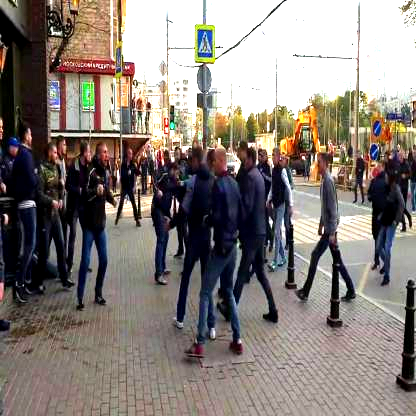

In [326]:
## Applying percentiles to perfrom contrast stretching

def contrast_stretching_percentile(image, percentile_min, percentile_max):
    # Calculate the minimum and maximum pixel values based on percentiles
    min_val = np.percentile(image, percentile_min)
    max_val = np.percentile(image, percentile_max)

    # Apply contrast stretching and normalize to the 0-255 range
    stretched_image = np.clip((image - min_val) * 255 / (max_val - min_val), 0, 255).astype(np.uint8)

    return stretched_image



# Apply contrast stretching with percentiles
stretched_image = contrast_stretching_percentile(image1, percentile_min=5, percentile_max=83)
print("This is contrsat stretched image for image 1")
cv2_imshow(stretched_image)

In [327]:
mean_color_image_stretched=np.mean(stretched_image, axis=(0,1))
mean_color_image_stretched

array([120.98513776, 126.69334204, 135.2270999 ])

In [328]:
var_perc= np.var(stretched_image)
var_perc

6961.689694005438

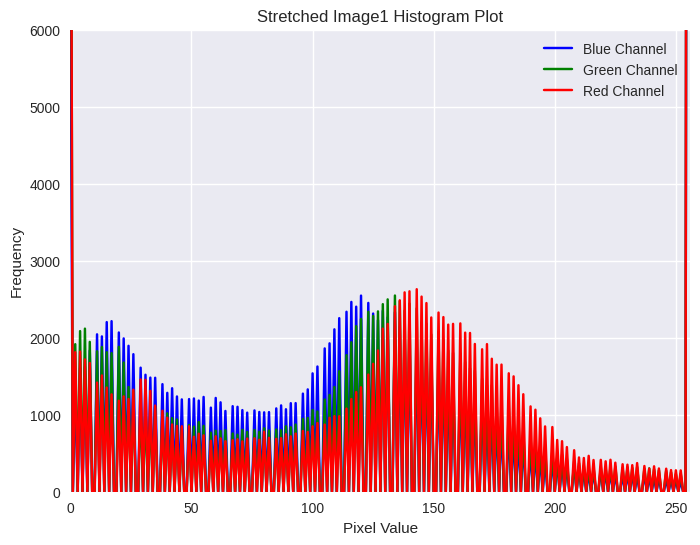

In [329]:
# Split the image into color channels
b, g, r = cv2.split(stretched_image)

# Create a histogram for each color channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Plot the histograms on a single figure
plt.figure(figsize=(8, 6))
plt.title("Stretched Image1 Histogram Plot")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.ylim(0,6000)

plt.plot(hist_b, color="blue", label="Blue Channel", alpha=1)
plt.plot(hist_g, color="green", label="Green Channel", alpha=1)
plt.plot(hist_r, color="red", label="Red Channel", alpha=1)

plt.legend(loc="upper right")
plt.grid(True)
plt.xticks(range(0, 256, 50))

plt.show()

### **2. Spatial processing for image enhancement**
**(2.1) Implement a function for histogram equalization**

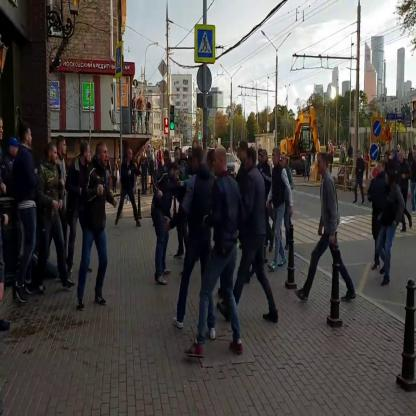

In [330]:
cv2_imshow(image1)

In [331]:
mean_color_image1=np.mean(image1, axis=(0,1))
mean_color_image1

array([73.20363351, 75.94248683, 79.59780071])

Applying histogram equalization function for image enhancement

In [332]:
def histogram_equalization(image):
    # Calculate the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Calculate the CDF
    cdf = hist.cumsum()

    # Normalize the CDF
    nor_cdf = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())

    # Map the image using normalized CDF
    equalized = nor_cdf[image]

    # Convert the equalized image to uint8 data type
    equalized_image = equalized.astype(np.uint8)

    return equalized_image

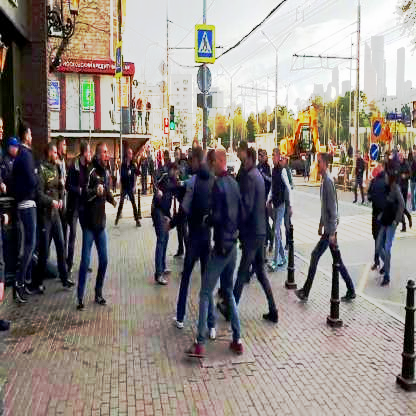

In [333]:
## Applying function
hist_equalized_image= histogram_equalization(image1)
cv2_imshow(hist_equalized_image)


In [334]:
mean_equalized_image1=np.mean(hist_equalized_image, axis=(0,1))
mean_equalized_image1

array([126.45237958, 131.66124838, 139.86827385])

In [335]:
from numpy.core.fromnumeric import var
var_equalized= np.var(hist_equalized_image)
var_equalized

5853.285887751478

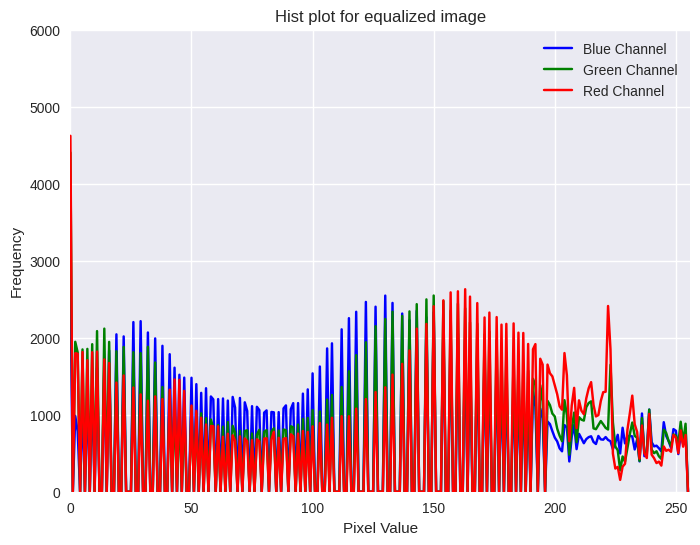

In [336]:
# Split the image into color channels
b, g, r = cv2.split(hist_equalized_image)

# Create a histogram for each color channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Plot the histograms on a single figure
plt.figure(figsize=(8, 6))
plt.title("Hist plot for equalized image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.ylim(0,6000)

plt.plot(hist_b, color="blue", label="Blue Channel", alpha=1)
plt.plot(hist_g, color="green", label="Green Channel", alpha=1)
plt.plot(hist_r, color="red", label="Red Channel", alpha=1)

plt.legend(loc="upper right")
plt.grid(True)
plt.xticks(range(0, 256, 50))

plt.show()

(2.1.1) Include your source code and the equalized image. Plot the intensity transformation function u vs. v obtained from the equalization function.

In [337]:
def histogram_equalization(image):
    # Calculate the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Calculate the CDF
    cdf = hist.cumsum()

    # Normalize the CDF
    nor_cdf = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())

    # Map the image using normalized CDF
    equalized = nor_cdf[image]

    # Convert the equalized image to uint8 data type
    equalized_image = equalized.astype(np.uint8)

    return equalized_image, nor_cdf

In [338]:
# Apply histogram equalization and get the normalized CDF
equalized_image1, nor_cdf1 = histogram_equalization(image1)

# Create an array of pixel intensity values (u)
u = np.arange(256)


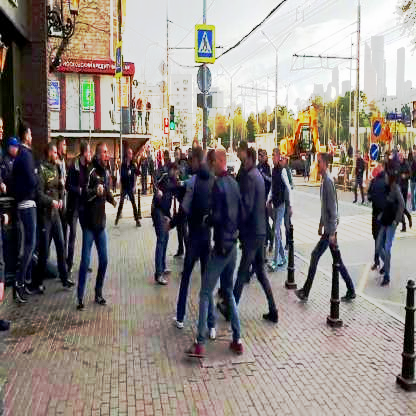

In [339]:
cv2_imshow(equalized_image1)

In [340]:
mean_equalized_image2=np.mean(equalized_image1, axis=(0,1))
mean_equalized_image2

array([126.45237958, 131.66124838, 139.86827385])

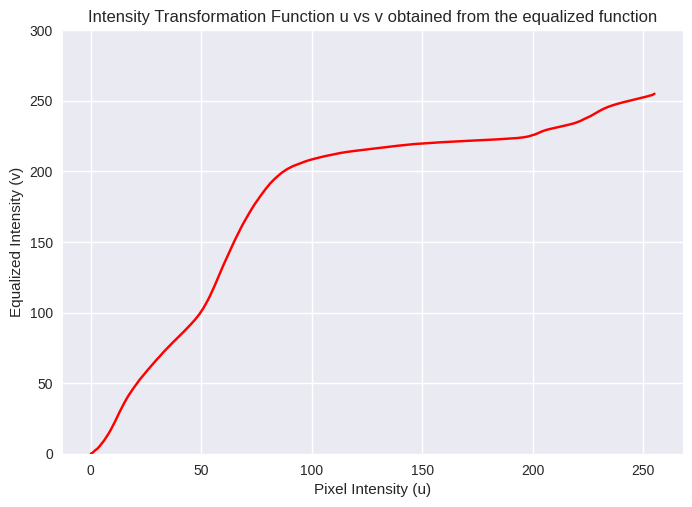

In [341]:
# Plot u vs. v
plt.plot(u, nor_cdf1, color="red")
plt.title('Intensity Transformation Function u vs v obtained from the equalized function')
plt.ylim(0,300)
plt.xlabel('Pixel Intensity (u)')
plt.ylabel('Equalized Intensity (v)')
plt.grid(True)
plt.show()

### **2.1.2 Experiment with contrast stretching with MATLAB or in an image editing software’s comment on the outcome in comparison with (2.1.1).**

The software used for this process is PhotoSpaceX editor where the image1 was uploaded and changes were made accordingly
 The values for brightnes was 53, clarity was 100, contrast was 0 and saturation was 11.

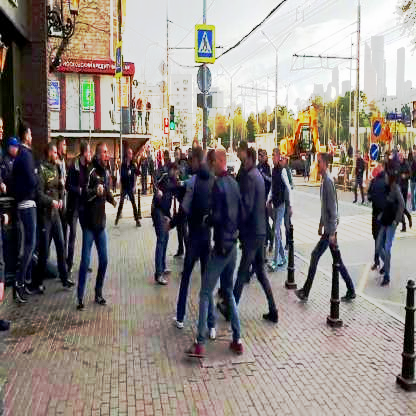

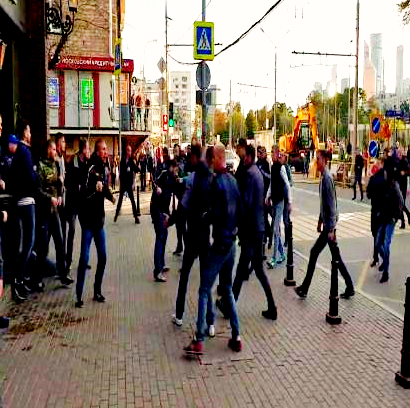

In [342]:
software_tool_photo= cv2.imread("/content/editor_photo.png")
(cv2_imshow(equalized_image1))
(cv2_imshow(software_tool_photo))

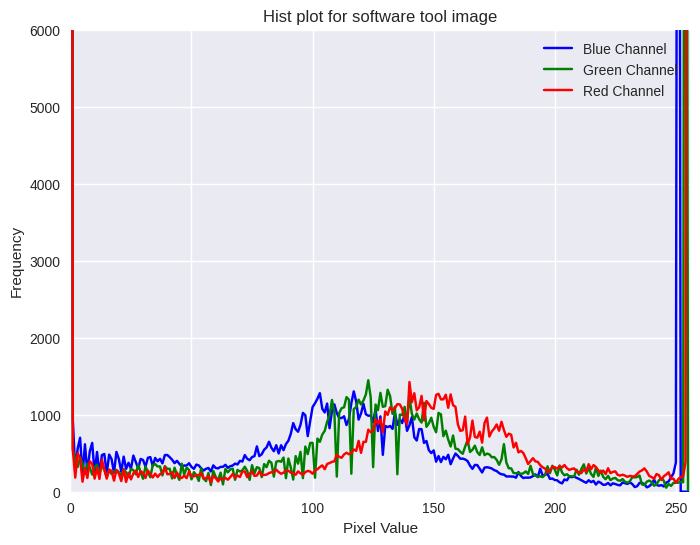

In [343]:
# Split the image into color channels
b, g, r = cv2.split(software_tool_photo)

# Create a histogram for each color channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Plot the histograms on a single figure
plt.figure(figsize=(8, 6))
plt.title("Hist plot for software tool image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.ylim(0,6000)

plt.plot(hist_b, color="blue", label="Blue Channel", alpha=1)
plt.plot(hist_g, color="green", label="Green Channel", alpha=1)
plt.plot(hist_r, color="red", label="Red Channel", alpha=1)

plt.legend(loc="upper right")
plt.grid(True)
plt.xticks(range(0, 256, 50))

plt.show()

In [344]:
mean_software_image=np.mean(software_tool_photo, axis=(0,1))
mean_software_image

array([102.51525586, 113.38210784, 126.25185916])

In [345]:
var_software= np.var(software_tool_photo)
var_software

7352.762690033324

### **2.3) Take an image (photo you took, medical image, or images from the web) and enhance it with spatial**

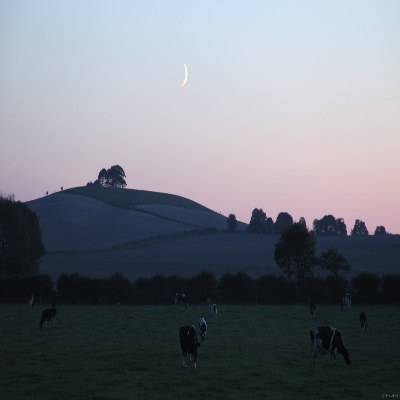

In [346]:
image4=cv2.imread("/content/cow.jpg")
# Define the new dimensions (width, height)
new_width, new_height = 400, 400

# Resize the image
resized_image = cv2.resize(image4, (new_width, new_height))
cv2_imshow(resized_image)

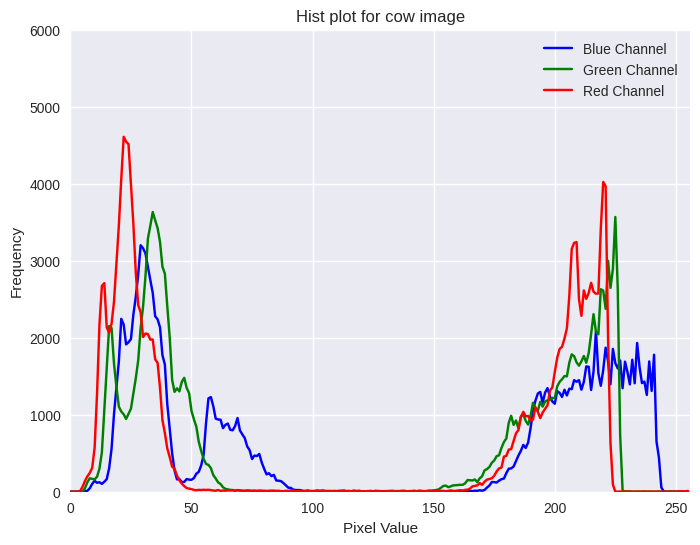

In [347]:
# Split the image into color channels
b, g, r = cv2.split(resized_image)

# Create a histogram for each color channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Plot the histograms on a single figure
plt.figure(figsize=(8, 6))
plt.title("Hist plot for cow image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.ylim(0,6000)

plt.plot(hist_b, color="blue", label="Blue Channel", alpha=1)
plt.plot(hist_g, color="green", label="Green Channel", alpha=1)
plt.plot(hist_r, color="red", label="Red Channel", alpha=1)

plt.legend(loc="upper right")
plt.grid(True)
plt.xticks(range(0, 256, 50))

plt.show()

In [348]:
mean_cow_image=np.mean(resized_image, axis=(0,1))
mean_cow_image

array([129.89026875, 121.92264375, 117.4793125 ])

In [349]:
var_cow= np.var(resized_image)
var_cow

7975.364094949928

Applying histogram equalization function for image enhancement

In [350]:
def histogram_equalization(image):
    # Calculate the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Calculate the CDF
    cdf = hist.cumsum()

    # Normalize the CDF
    nor_cdf = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())

    # Map the image using normalized CDF
    equalized = nor_cdf[image]

    # Convert the equalized image to uint8 data type
    equalized_image = equalized.astype(np.uint8)

    return equalized_image

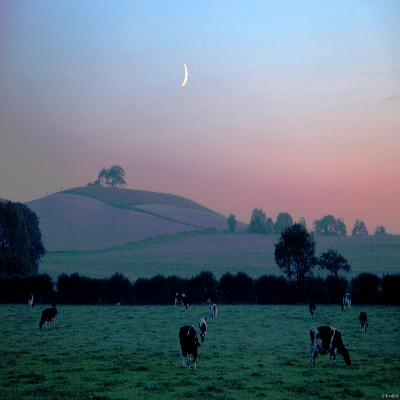

In [351]:
## Applying function
hist_equalized_image2= histogram_equalization(resized_image)
cv2_imshow(hist_equalized_image2)

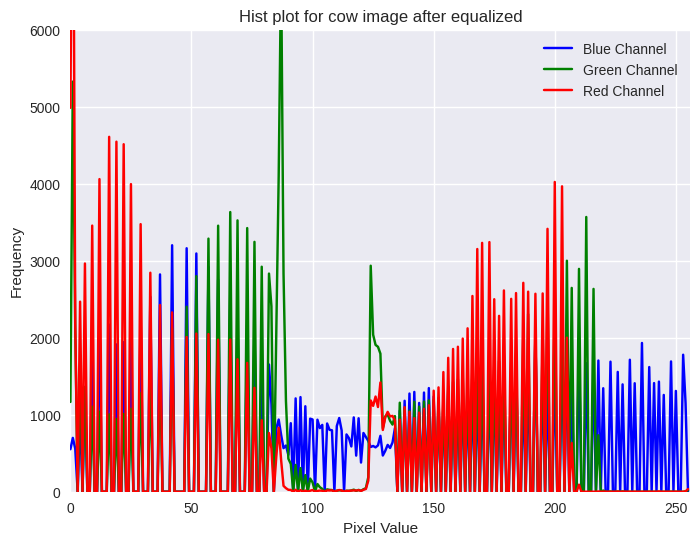

In [352]:
# Split the image into color channels
b, g, r = cv2.split(hist_equalized_image2)

# Create a histogram for each color channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Plot the histograms on a single figure
plt.figure(figsize=(8, 6))
plt.title("Hist plot for cow image after equalized")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.ylim(0,6000)

plt.plot(hist_b, color="blue", label="Blue Channel", alpha=1)
plt.plot(hist_g, color="green", label="Green Channel", alpha=1)
plt.plot(hist_r, color="red", label="Red Channel", alpha=1)

plt.legend(loc="upper right")
plt.grid(True)
plt.xticks(range(0, 256, 50))

plt.show()

In [353]:
mean_cow_equ_image=np.mean(hist_equalized_image2, axis=(0,1))
mean_cow_equ_image

array([128.2809875 , 115.1449375 , 100.34660625])

In [354]:
var_cow_eq= np.var(hist_equalized_image2)
var_cow_eq

5202.393684913083

**Write an M-function that
Apply a gamma correction algorithm on image f and produces image g.**

In [355]:
#3 Here we use f(x) and apply gama function to produce g(x) where gamma is the power function.
##S= z^(gamma) or s= c(z+a)^(gamma) where c and a are positive constant gray level expansion and 0<gamma|< gray level compression

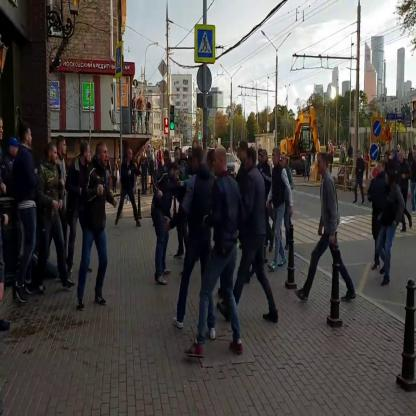

The gamma values is 1 None


In [356]:
#3 define a gamma correction function
def gamma_corr(image, gamma):
  ## Applying gamma to each channels
  correction_image = np.power(image, gamma)
  ## ensure that values are in the pixel range(0,255)
  correction_image1= np.clip(correction_image, 0,255).astype(np.uint8)
  return correction_image1



correction_image1= gamma_corr(image1, 1)

print("The gamma values is 1",cv2_imshow(correction_image1))


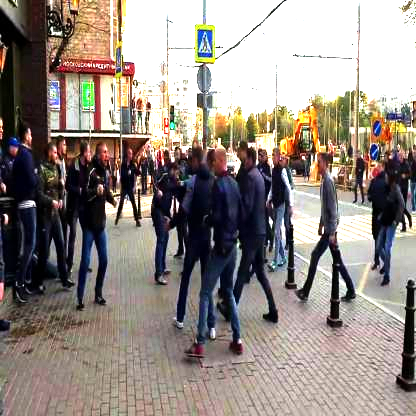

The gamma values is 1.2 None


In [357]:
correction_image2= gamma_corr(image1, 1.2)

print("The gamma values is 1.2", cv2_imshow(correction_image2))


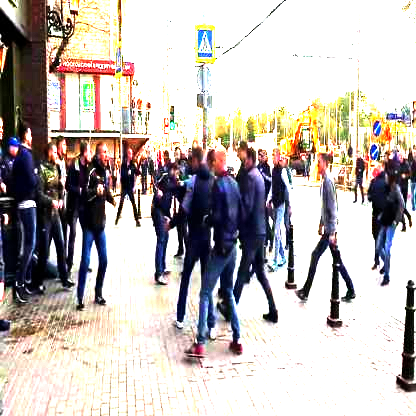

The gamma values is 1.35 None


In [358]:
correction_image3= gamma_corr(image1, 1.35)

print("The gamma values is 1.35",cv2_imshow(correction_image3))

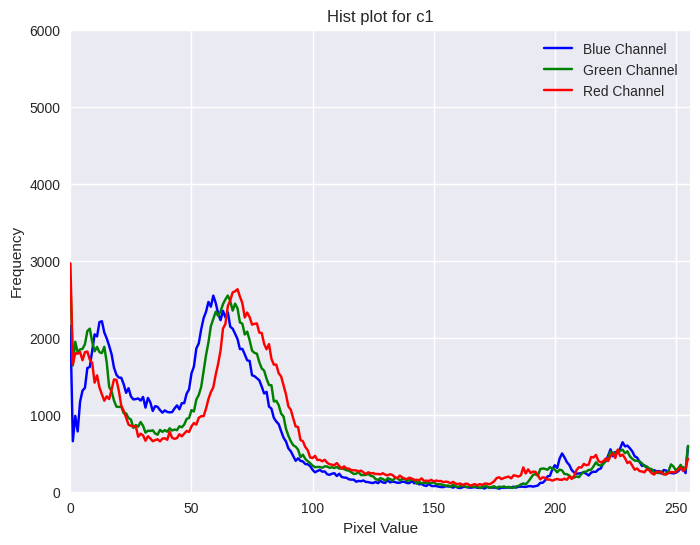

In [359]:

  # Split the image into color channels
b, g, r = cv2.split(correction_image1)
# Create a histogram for each color channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Plot the histograms on a single figure
plt.figure(figsize=(8, 6))
plt.title("Hist plot for c1")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.ylim(0,6000)

plt.plot(hist_b, color="blue", label="Blue Channel", alpha=1)
plt.plot(hist_g, color="green", label="Green Channel", alpha=1)
plt.plot(hist_r, color="red", label="Red Channel", alpha=1)

plt.legend(loc="upper right")
plt.grid(True)
plt.xticks(range(0, 256, 50))
plt.show()

In [360]:
mean_c1=np.mean(correction_image1, axis=(0,1))
mean_c1

array([73.20363351, 75.94248683, 79.59780071])

In [361]:
var_c1=np.var(correction_image1)
var_c1

4265.468745894028

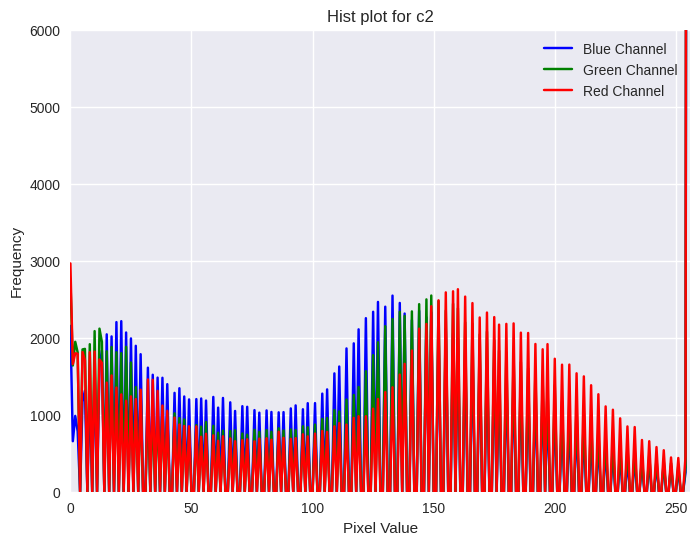

In [362]:

  # Split the image into color channels
b, g, r = cv2.split(correction_image2)

 # Create a histogram for each color channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    # Plot the histograms on a single figure
plt.figure(figsize=(8, 6))
plt.title("Hist plot for c2")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.ylim(0,6000)

plt.plot(hist_b, color="blue", label="Blue Channel", alpha=1)
plt.plot(hist_g, color="green", label="Green Channel", alpha=1)
plt.plot(hist_r, color="red", label="Red Channel", alpha=1)

plt.legend(loc="upper right")
plt.grid(True)
plt.xticks(range(0, 256, 50))
plt.show()

In [363]:
mean_c2=np.mean(correction_image2, axis=(0,1))
mean_c2

array([130.76696561, 137.2758529 , 146.90265001])

In [364]:
var_c2=np.var(correction_image2)
var_c2

7439.5236598984075

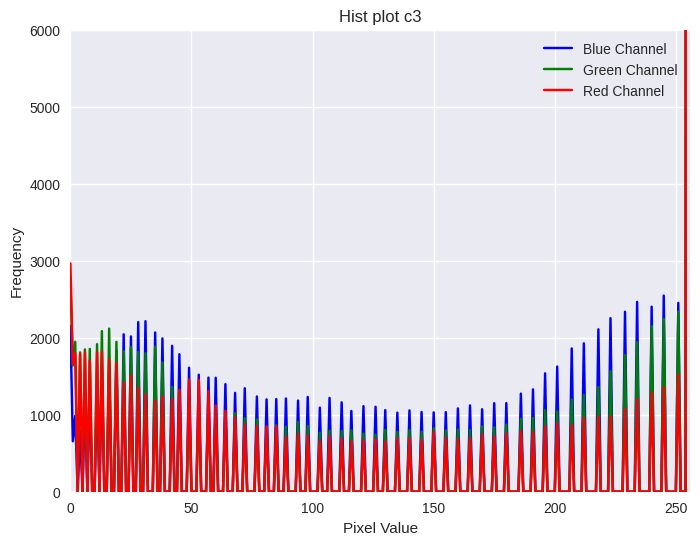

In [365]:

# Split the image into color channels
b, g, r = cv2.split(correction_image3)

# Create a histogram for each color channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Plot the histograms on a single figure
plt.figure(figsize=(8, 6))
plt.title("Hist plot c3")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.ylim(0,6000)

plt.plot(hist_b, color="blue", label="Blue Channel", alpha=1)
plt.plot(hist_g, color="green", label="Green Channel", alpha=1)
plt.plot(hist_r, color="red", label="Red Channel", alpha=1)

plt.legend(loc="upper right")
plt.grid(True)
plt.xticks(range(0, 256, 50))
plt.show()

In [366]:
mean_c3=np.mean(correction_image3, axis=(0,1))
mean_c3

array([179.34796829, 183.16689395, 190.38950398])

In [367]:
var_c3=np.var(correction_image3)
var_c3

9124.941137397329

**(4) Apply the retinex image enhancement method. See the next slide 5 for help**

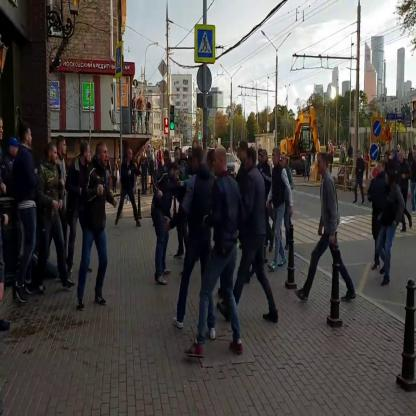

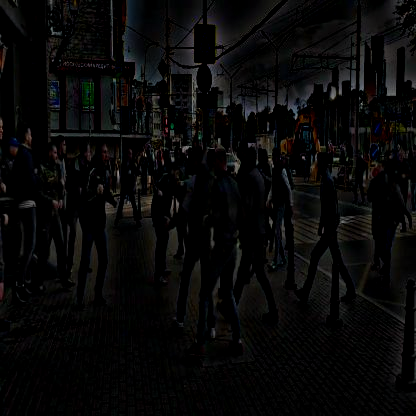

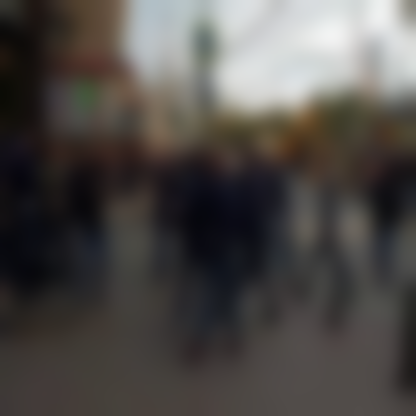

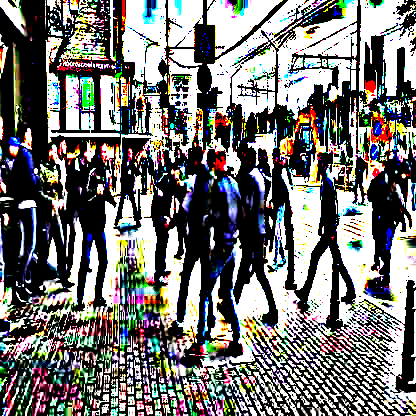

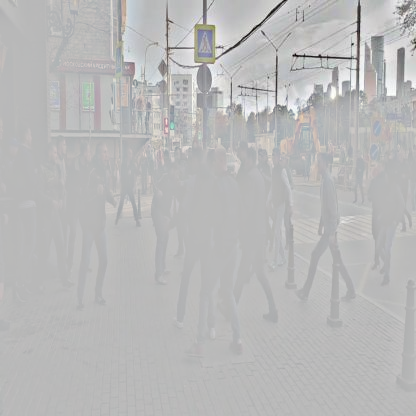

In [368]:
def retinex_decomposition(image, sigma_s=10):
    # Convert the image to float32
    image_float = image.astype(float)

    # Apply Gaussian blur to the input image
    blurred = cv2.GaussianBlur(image_float, (0, 0), sigma_s)

    # Calculate the reflectance
    reflectance = image_float - blurred


    # Calculate the illumination
    illumination = blurred



    # Calculate the combined image
    combined = reflectance * illumination


    return reflectance, illumination, combined

# Load an image
image = cv2.imread("/content/V3.jpg")

# Perform Retinex decomposition and histogram equalization
reflectance, illumination, combined = retinex_decomposition(image)
# Normalize the combined image
combined_normalized = cv2.normalize(combined, None, 0, 255, cv2.NORM_MINMAX)




# Display or save the results
cv2_imshow(image)
cv2_imshow(reflectance)
cv2_imshow(illumination)
cv2_imshow(combined)
cv2_imshow(combined_normalized)

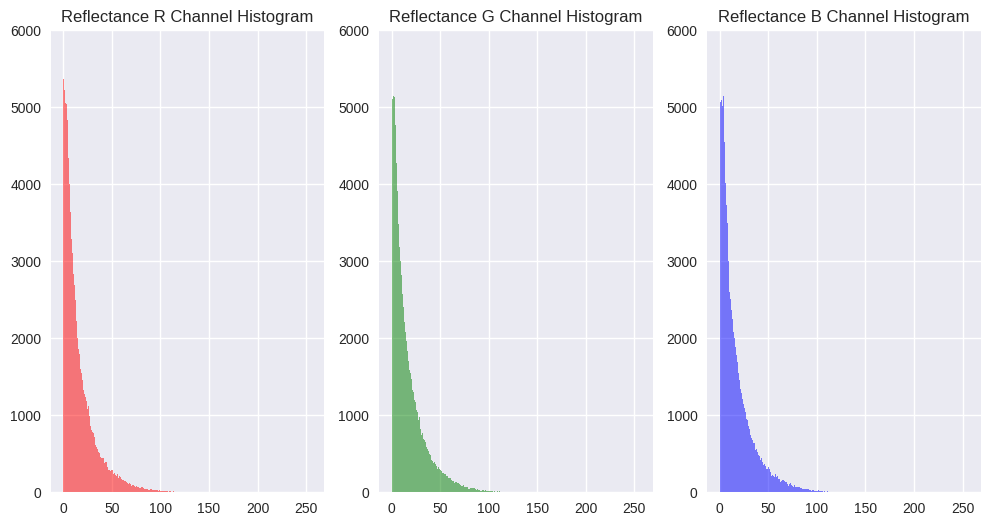

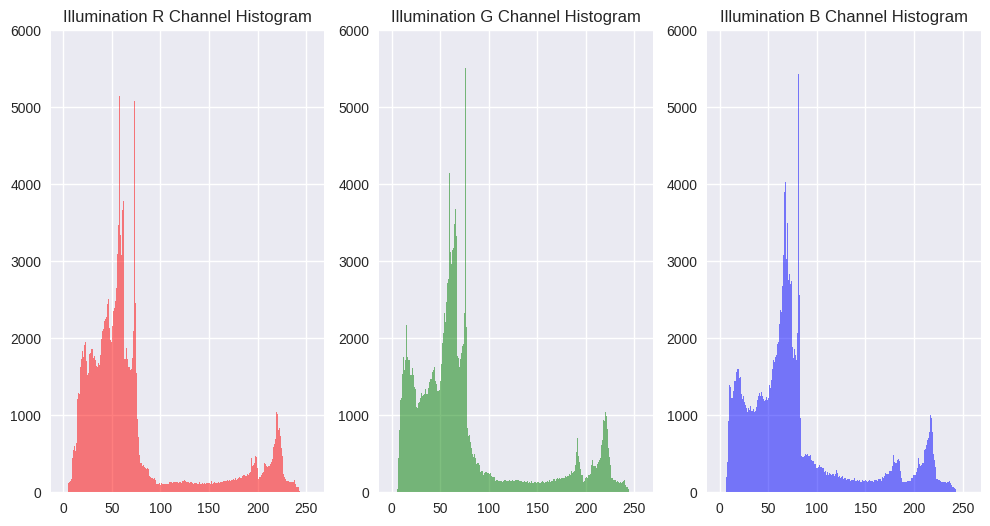

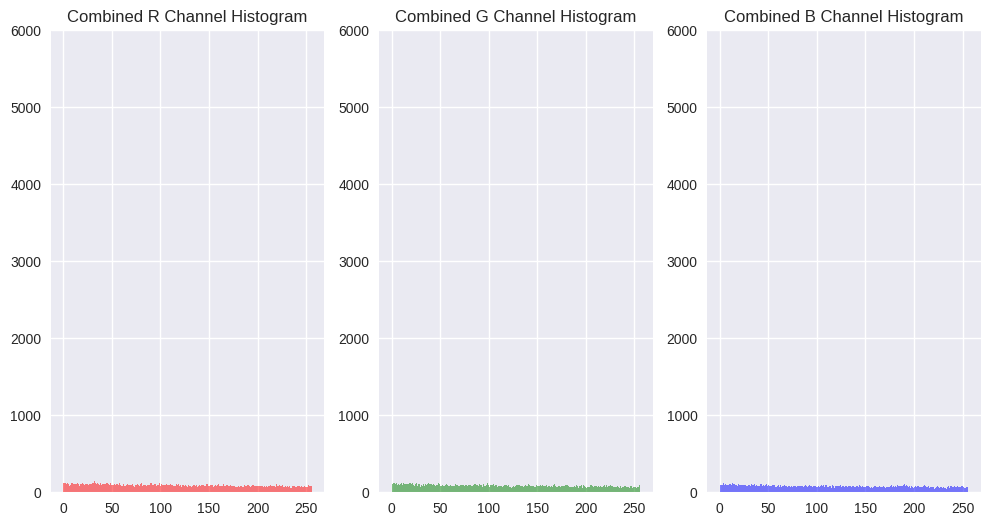

In [369]:
# Plot histograms for each color channel
def plot_histograms(image, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(131)

    plt.hist(cv2.split(image)[0].ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
    plt.title(title + ' R Channel Histogram')
    plt.ylim(0,6000)
    plt.subplot(132)
    plt.hist(cv2.split(image)[1].ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
    plt.title(title + ' G Channel Histogram')
    plt.ylim(0,6000)
    plt.subplot(133)
    plt.hist(cv2.split(image)[2].ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
    plt.title(title + ' B Channel Histogram')
    plt.ylim(0,6000)

    plt.show()
plot_histograms(reflectance, 'Reflectance')
plot_histograms(illumination, 'Illumination')
plot_histograms(combined, 'Combined')

In [370]:
## calculating values of reflectance, illumination and combined image one by one.

In [371]:
mean_il_image=np.mean(illumination, axis=(0,1))
mean_il_image

array([73.17767335, 75.91375873, 79.56597372])

In [372]:
var_il= np.var(illumination)
var_il

3353.5934302168716

In [373]:
mean_r_image=np.mean(reflectance, axis=(0,1))
mean_r_image

array([0.02596016, 0.02872809, 0.03182699])

In [374]:
var_r= np.var(reflectance)
var_r

657.0136052693862

In [375]:
mean_co_image=np.mean(combined, axis=(0,1))
mean_co_image

array([133.7303253 , 128.03333735, 127.12301955])

In [376]:
var_co= np.var(combined)
var_co

10356422.917013735

In [377]:
mean_nor_image=np.mean(combined_normalized, axis=(0,1))
mean_nor_image

array([185.86000213, 185.83557107, 185.83166725])

In [378]:
var_nor= np.var(combined_normalized)
var_nor

190.4600100990309

All values produced here are matched to images in pdf respectively

In [379]:
############################################################################################THE END################################################################################################